In [74]:
import pandas as pd
import numpy as np

In [75]:
mba_salary_df = pd.read_csv('MBA_Salary.csv')

In [76]:
mba_salary_df.columns

Index(['S. No.', 'Percentage in Grade 10', 'Salary'], dtype='object')

In [77]:
mba_salary_df.head(5)

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [78]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [79]:
import statsmodels.api as sm
X = sm.add_constant(mba_salary_df['Percentage in Grade 10'])
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [80]:
Y = mba_salary_df['Salary']

In [81]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, train_size = 0.8, random_state = 100)

In [82]:
mba_salary_lm = sm.OLS(train_Y, train_X).fit()

In [83]:
print(mba_salary_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [84]:
# The equation looks like this: MBA Salary = 30587.285 + 3560.587 * (Percentage in Grade 10)
# The equation can be intepreted as follows for every 1% increase in Grade 10, the salary of the MBA students will increase by 3560.578

# Model validation
1. Co-efficient of determination (R-squared)
2. Hypothesis test for the regression coefficient
3. Analysis of variance for overall model validity (Important for multiple linear regression)
4. Residual analysis to validate the regression model assumptions
5. Outlier analysis, since the presence of outliers can significantly impact the regression parameters

# Co-effecient of Determination (R Squared or R^2)
The primary objective of regression is to explain the variation in Y using the knowledge of X. The co-effecient of determination (R-Squared or R^2) measures the percentage of variation in Y explained by the model (Beta0 + Beta1X). The simple linear regression model can be broken into 
1. Variation in outcome variable explained by the model
2. Unexplained variation
   Ys = Beta0 + Beta1.X1 + E1
   note: Beta0 and Beta1.X1 is the variantion in Y explained by the model
         E1 is the variation in Y not explained by the model
# The co-effecient of determination (R-Squared) has the following properties
1. The value of R-squared lies between 0 and 1
2. Mathematically, R-squared is square of correlation coefficient (R^2 = r^2), where r is the Pearson Correlation Co-effecient
3. Higher R-squared indicates better fit, however, one should be careful about the spurious realationship.
   

# Regression Model Summary Using Python

In [85]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2024-11-04 11:24      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

# Multiple Linear Regression

Multiple linear regression (MLR) is a supervised learning algorithm for finding the existence of an association relationship between a dependent variable (aka response variable or outcome variable) and severatl independent variables (aka explantory variables or predictor variable or features)
The functional form of MLR is given by
Y1 = Beta0 + Beta1X1i + BetaX2i + .... + BetakXki + Ei
The regression coeffienentss Beta1, Beta2, ... Betak are called partial regression coefficients sincce the relationship between explanatory variable and the response variable is called after removing the effect all the other explanatory variable (features) in the model.
The assumption that are made in the multiple linear regression model are as follows
1. The regression model is linear in regression parameters (Beta-values)
2. The residuals follow a normal distribution and the expected value (mean) of the residuals is zero
3. In time series data, residuals are assumed to uncorrelated
4. The ariance of the residuals is constant for all values of X1, When the variance of the residucals is constant for different values of Xi, it is called homoscenasticity. A non-constant variance of residuals is called heteroscedasticity.
5. There is no high correlation between independent variables in the model (called multi-collinearity). Multi-collinearity can destablilize the model and can reslut in an incorrect estimation of the regression parameters.

In [288]:
import pandas as pd
ipl_auction_df = pd.read_csv("IPL IMB381IPL2013.csv")

In [289]:
ipl_auction_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [290]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [291]:
ipl_auction_df.info

<bound method DataFrame.info of      Sl.NO.   PLAYER NAME  AGE COUNTRY   TEAM PLAYING ROLE  T-RUNS  T-WKTS  \
0         1   Abdulla, YA    2      SA   KXIP   Allrounder       0       0   
1         2  Abdur Razzak    2     BAN    RCB       Bowler     214      18   
2         3   Agarkar, AB    2     IND    KKR       Bowler     571      58   
3         4     Ashwin, R    1     IND    CSK       Bowler     284      31   
4         5  Badrinath, S    2     IND    CSK      Batsman      63       0   
..      ...           ...  ...     ...    ...          ...     ...     ...   
125     126     Yadav, AS    2     IND     DC      Batsman       0       0   
126     127   Younis Khan    2     PAK     RR      Batsman    6398       7   
127     128  Yuvraj Singh    2     IND  KXIP+      Batsman    1775       9   
128     129   Zaheer Khan    2     IND    MI+       Bowler    1114     288   
129     130    Zoysa, DNT    2      SL     DC       Bowler     288      64   

     ODI-RUNS-S  ODI-SR-B  ... 

In [292]:
ipl_auction_df.head(5)

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [293]:
# Displaying only first 10 columns of the Dataframe
ipl_auction_df.iloc[0:5,0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


## We can build a model to understand what features of players are influencing their SOLD PRICE or perdict the player's auction prices in future. However, all not features. However, all columns are not features. For example, SL.NO. is just a serial number and cannot be considered a feature of the player. We will build a mode using only player's statistics. So, BASE PRICE can also ber removed. We will create a variable X_feature which will contain the list of features that we will finally user for building the model and ignore rest of the columns of the DataFrame. The following function is used for including the features in the model building.


In [294]:
X_features = ipl_auction_df.columns

In [295]:
X_features

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [296]:
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [297]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,True,False,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,True,False,False


In [298]:
X_features

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [299]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [300]:
X_features

['AGE',
 'COUNTRY',
 'PLAYING ROLE',
 'T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'CAPTAINCY EXP',
 'RUNS-S',
 'HS',
 'AVE',
 'SR-B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL']

In [301]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [302]:
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features], columns = categorical_features, drop_first = True)

In [305]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [303]:
ipl_auction_encoded_df

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,False,False,True,False,False,False,False,False,False,False
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,False,False,False,False,False,False,False,True,False,False
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,False,False,False,False,False,False,False,True,False,False
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,False,False,False,False,False,False,False,True,False,False
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0.00,0,0.0,49,16,9.80,125.64,...,False,False,False,False,False,False,True,False,False,False
126,6398,7,6814,75.78,3,86.6,3,3,3.00,42.85,...,False,True,False,False,False,False,True,False,False,True
127,1775,9,8051,87.58,109,44.3,1237,66,26.32,131.88,...,False,False,False,False,False,False,True,False,False,True
128,1114,288,790,73.55,278,35.4,99,23,9.90,91.67,...,False,False,False,False,False,False,False,True,False,False


In [306]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [307]:
ipl_auction_encoded_df.iloc[0:4, 10:18]

,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3
0,0,307,15,20.47,8.90,13.93,True,False
1,0,29,0,0.00,14.50,0.00,True,False
2,5,1059,29,36.52,8.81,24.90,True,False
3,0,1125,49,22.96,6.23,22.14,False,False


In [308]:
X_features = ipl_auction_encoded_df.columns

In [309]:
X_features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [324]:
df = ipl_auction_encoded_df

In [325]:
df

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,0,0,1,0,0,0,0,0,0,False
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,0,0,0,0,0,0,0,1,0,False
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,0,0,0,0,0,0,0,1,0,False
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,0,0,0,0,0,0,0,1,0,False
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,0,0,0,0,0,0,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0.00,0,0.0,49,16,9.80,125.64,...,0,0,0,0,0,0,1,0,0,False
126,6398,7,6814,75.78,3,86.6,3,3,3.00,42.85,...,0,1,0,0,0,0,1,0,0,True
127,1775,9,8051,87.58,109,44.3,1237,66,26.32,131.88,...,0,0,0,0,0,0,1,0,0,True
128,1114,288,790,73.55,278,35.4,99,23,9.90,91.67,...,0,0,0,0,0,0,0,1,0,False


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   T-RUNS                  130 non-null    int64  
 1   T-WKTS                  130 non-null    int64  
 2   ODI-RUNS-S              130 non-null    int64  
 3   ODI-SR-B                130 non-null    float64
 4   ODI-WKTS                130 non-null    int64  
 5   ODI-SR-BL               130 non-null    float64
 6   RUNS-S                  130 non-null    int64  
 7   HS                      130 non-null    int64  
 8   AVE                     130 non-null    float64
 9   SR-B                    130 non-null    float64
 10  SIXERS                  130 non-null    int64  
 11  RUNS-C                  130 non-null    int64  
 12  WKTS                    130 non-null    int64  
 13  AVE-BL                  130 non-null    float64
 14  ECON                    130 non-null    fl

In [328]:
# Converting all the new dummy variable types from boolean to int


In [329]:
df = df.astype(int)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   T-RUNS                  130 non-null    int32
 1   T-WKTS                  130 non-null    int32
 2   ODI-RUNS-S              130 non-null    int32
 3   ODI-SR-B                130 non-null    int32
 4   ODI-WKTS                130 non-null    int32
 5   ODI-SR-BL               130 non-null    int32
 6   RUNS-S                  130 non-null    int32
 7   HS                      130 non-null    int32
 8   AVE                     130 non-null    int32
 9   SR-B                    130 non-null    int32
 10  SIXERS                  130 non-null    int32
 11  RUNS-C                  130 non-null    int32
 12  WKTS                    130 non-null    int32
 13  AVE-BL                  130 non-null    int32
 14  ECON                    130 non-null    int32
 15  SR-BL                  

In [330]:
ipl_auction_encoded_df = df


In [331]:
import statsmodels.api as sm
import pandas as pd
import numpy as np


In [332]:
X = sm.add_constant (ipl_auction_encoded_df)

In [333]:
Y = ipl_auction_df['SOLD PRICE']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size = 0.8, random_state = 42)

In [334]:
train_X

,const,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
70,1.0,0,0,1,50,1,42,4,3,4,...,0,0,0,0,0,0,0,1,0,0
78,1.0,0,0,3,100,0,0,7,4,3,...,0,0,0,0,0,0,0,1,0,0
47,1.0,1000,0,1008,74,0,0,1231,69,24,...,0,0,0,0,0,0,0,0,1,0
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12,1.0,5,3,38,65,32,41,337,24,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,0,0,0,0,0,0,563,35,19,...,0,0,0,0,0,0,0,0,0,0
106,1.0,770,272,142,73,91,33,70,13,4,...,0,0,1,0,0,0,0,1,0,0
14,1.0,0,0,69,56,0,0,1540,95,31,...,0,0,0,0,0,0,1,0,0,0
92,1.0,5842,23,5644,75,16,36,73,31,18,...,0,0,0,0,1,0,1,0,0,0


In [335]:
ipl_model_1 = sm.OLS(train_Y, train_X).fit()

In [337]:
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.364     
Dependent Variable:        SOLD PRICE              AIC:                       2964.8676 
Date:                      2024-11-04 13:44        BIC:                       3049.4881 
No. Observations:          104                     Log-Likelihood:            -1450.4   
Df Model:                  31                      F-statistic:               2.904     
Df Residuals:              72                      Prob (F-statistic):        0.000103  
R-squared:                 0.556                   Scale:                     1.0990e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   372659.1870 227434.2708  1.6385 0.1057  -80722.7456  826041.1196
T-RUNS                     -52.3888     32.6499 -1.6046 0.1130    -117.4751      12.6975
T-WKTS                    -111.0099    609.1010 -0.1823 0.8559   -1325.2305    1103.2107
ODI-RUNS-S                  57.5472     31.4611  1.8292 0.0715      -5.1694     120.2638
ODI-SR-B                  -507.6748   1576.0642 -0.3221 0.7483   -3649.5013    2634.1518
ODI-WKTS                   785.7553    829.5857  0.9472 0.3467    -867.9936    2439.5041
ODI-SR-BL                 -800.5354   1535.7799 -0.5213 0.6038   -3862.0566    2260.9858
RUNS-S                     111.9832    172.9037  0.6477 0.5193    -232.6940     456.6604
HS                       -5623.1814   2582.9130 -2.1771 0.0328  -10772.1243    -474.2385
AVE                      22000.9765   7772.2768  2.8307 0.0060    6507.2258   37494.7272
SR-B                     -1317.3506   1366.2137 -0.9642 0.3382   -4040.8479    1406.1466
SIXERS                    4330.7634   4081.1760  1.0612 0.2922   -3804.9122   12466.4390
RUNS-C                      63.2961    297.5020  0.2128 0.8321    -529.7632     656.3554
WKTS                      3320.9611   7260.0208  0.4574 0.6487  -11151.6258   17793.5481
AVE-BL                    4068.6464  10102.8277  0.4027 0.6883  -16070.9726   24208.2654
ECON                     -8322.2586  12997.2187 -0.6403 0.5240  -34231.7404   17587.2233
SR-BL                    -5723.0804  13855.0110 -0.4131 0.6808  -33342.5400   21896.3792
AGE_2                  -227379.0287 113760.8021 -1.9987 0.0494 -454157.0429    -601.0145
AGE_3                  -214947.2649 152021.3599 -1.4139 0.1617 -517996.3072   88101.7774
COUNTRY_BAN             -94939.8648 437698.6503 -0.2169 0.8289 -967476.1774  777596.4477
COUNTRY_ENG             661489.9061 237606.1666  2.7840 0.0069  187830.6698 1135149.1425
COUNTRY_IND             158549.8025 126387.5248  1.2545 0.2137  -93399.1235  410498.7284
COUNTRY_NZ              202111.4119 173652.8262  1.1639 0.2483 -144059.1704  548281.9942
COUNTRY_PAK              84452.7198 193553.6344  0.4363 0.6639 -301389.3987  470294.8382
COUNTRY_SA               57750.2131 144542.2005  0.3995 0.6907 -230389.3974  345889.8235
COUNTRY_SL               20044.9921 175917.8867  0.1139 0.9096 -330640.9057  370730.8899
COUNTRY_WI                6359.2147 229993.7793  0.0276 0.9780 -452125.0049  464843.4342
COUNTRY_ZIM            -140530.8519 401096.4495 -0.3504 0.7271 -940102.0106  659040.3068
PLAYING ROLE_Batsman     79302.5819 149573.8530  0.5302 0.5976 -218867.4446  377472.6085
PLAYING ROLE_Bowler      10036.6107 125895.4548  0.0797 0.9367 -240931.3916  261004.6130
PLAYING ROLE_W. Keeper  -71971.1812 212430.8452 -0.3388 0.7357 -495444.3316  351501.9693
CAPTAINCY EXP_1         161764.7151 123273.7283  1.3122 0.1936  -83976.9709  407506.4012
----------------------------------------------------------------

In [338]:
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.364     
Dependent Variable:        SOLD PRICE              AIC:                       2964.8676 
Date:                      2024-11-04 13:45        BIC:                       3049.4881 
No. Observations:          104                     Log-Likelihood:            -1450.4   
Df Model:                  31                      F-statistic:               2.904     
Df Residuals:              72                      Prob (F-statistic):        0.000103  
R-squared:                 0.556                   Scale:                     1.0990e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   372659.1870 227434.2708  1.6385 0.1057  -80722.7456  826041.1196
T-RUNS                     -52.3888     32.6499 -1.6046 0.1130    -117.4751      12.6975
T-WKTS                    -111.0099    609.1010 -0.1823 0.8559   -1325.2305    1103.2107
ODI-RUNS-S                  57.5472     31.4611  1.8292 0.0715      -5.1694     120.2638
ODI-SR-B                  -507.6748   1576.0642 -0.3221 0.7483   -3649.5013    2634.1518
ODI-WKTS                   785.7553    829.5857  0.9472 0.3467    -867.9936    2439.5041
ODI-SR-BL                 -800.5354   1535.7799 -0.5213 0.6038   -3862.0566    2260.9858
RUNS-S                     111.9832    172.9037  0.6477 0.5193    -232.6940     456.6604
HS                       -5623.1814   2582.9130 -2.1771 0.0328  -10772.1243    -474.2385
AVE                      22000.9765   7772.2768  2.8307 0.0060    6507.2258   37494.7272
SR-B                     -1317.3506   1366.2137 -0.9642 0.3382   -4040.8479    1406.1466
SIXERS                    4330.7634   4081.1760  1.0612 0.2922   -3804.9122   12466.4390
RUNS-C                      63.2961    297.5020  0.2128 0.8321    -529.7632     656.3554
WKTS                      3320.9611   7260.0208  0.4574 0.6487  -11151.6258   17793.5481
AVE-BL                    4068.6464  10102.8277  0.4027 0.6883  -16070.9726   24208.2654
ECON                     -8322.2586  12997.2187 -0.6403 0.5240  -34231.7404   17587.2233
SR-BL                    -5723.0804  13855.0110 -0.4131 0.6808  -33342.5400   21896.3792
AGE_2                  -227379.0287 113760.8021 -1.9987 0.0494 -454157.0429    -601.0145
AGE_3                  -214947.2649 152021.3599 -1.4139 0.1617 -517996.3072   88101.7774
COUNTRY_BAN             -94939.8648 437698.6503 -0.2169 0.8289 -967476.1774  777596.4477
COUNTRY_ENG             661489.9061 237606.1666  2.7840 0.0069  187830.6698 1135149.1425
COUNTRY_IND             158549.8025 126387.5248  1.2545 0.2137  -93399.1235  410498.7284
COUNTRY_NZ              202111.4119 173652.8262  1.1639 0.2483 -144059.1704  548281.9942
COUNTRY_PAK              84452.7198 193553.6344  0.4363 0.6639 -301389.3987  470294.8382
COUNTRY_SA               57750.2131 144542.2005  0.3995 0.6907 -230389.3974  345889.8235
COUNTRY_SL               20044.9921 175917.8867  0.1139 0.9096 -330640.9057  370730.8899
COUNTRY_WI                6359.2147 229993.7793  0.0276 0.9780 -452125.0049  464843.4342
COUNTRY_ZIM            -140530.8519 401096.4495 -0.3504 0.7271 -940102.0106  659040.3068
PLAYING ROLE_Batsman     79302.5819 149573.8530  0.5302 0.5976 -218867.4446  377472.6085
PLAYING ROLE_Bowler      10036.6107 125895.4548  0.0797 0.9367 -240931.3916  261004.6130
PLAYING ROLE_W. Keeper  -71971.1812 212430.8452 -0.3388 0.7357 -495444.3316  351501.9693
CAPTAINCY EXP_1         161764.7151 123273.7283  1.3122 0.1936  -83976.9709  407506.4012
----------------------------------------------------------------

## MRL Model output: As per the output, only the features HS, AGE_2, AVE and COUNTRY_ENG hvae come out significant. The model says that none of the other featurs are influencing SOLD PRICE (at a significance value of 0.05). This is not very intuitive and could be a result of multi-collinearity effect of variables

# Multi-Collinearity and Handling Multi-Collinearity

When the dataset has a large number of independent variables (features), it is possible that few of these independent variables (features) may be highly correlated. The existence of a high correlation between independent variables is called multi-collinearity. Presence of multi-collinearity can destabilize the Multiple Linear Regression Model. Thus its necessary to identify the parameters of multi-collinearity and take corrective actions.
Multi-collinearity can have the following impact on the model:
    1. The standard error of estimates is inflated
    2. A statistically significant explanatory variable may be labelled as statisticaly insignificant due to the large p-value. This is because when the standard error of estimate is inflated, it results in an understaimation of t-statitics value.
    3. The sign of the regression coeffecient may be different, that is, instead of negative value for a regression coeffiecient, we may have a positive regression coefficient and vice versa
    4. Adding/removing a variabel or even an observation may result in large variation in regression coefficient estimates.
    

# Varition Inflation Factor (VIF) 
VIF is a measure used for identifying the existence of multi-collinearity. For example, consider two independent variables X1 and X2 and regression between them.
X1 = Alph0 + Alpha1X2
Let R12 be the R-squared value of this model. Then the VIF, wich is a measure of multi-collinearity, is given by
VIF = 1 /  1-(R12)^2
SquareRoot of VIF is the value by with the t-statistic value is deflated. VIF value greater than 4 requires furhter investigation to assess the impact of multi-collinearity. One approach to eliminate multi-collinearity is to remove one of the variable from the model building.
variation_inflation_factor() method available in the statsmodel.stats.outliers_influnece package can be used to calculate VIF for the features. The following method is writtein to calculate VIF and assign the VIF to the columns and return a DataFrame.

In [341]:
X_features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [342]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [343]:
def get_vif_factors(X):
#    X_matrix = X.as_matrix()
    X_matrix = X.values
    vif = [variance_inflation_factor(X_matrix, i) for i in range (X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [344]:
# Now calling the above method with the X features will return the VIF for corresponding features

In [345]:
X_features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [346]:
X_features = ipl_auction_encoded_df.columns

In [347]:
X_features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [348]:
ipl_auction_encoded_df

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71,185,37,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80,288,32,167,39,18,121,...,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84,51,36,58,11,5,76,...,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45,0,0,1317,71,32,120,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0,0,0,49,16,9,125,...,0,0,0,0,0,0,1,0,0,0
126,6398,7,6814,75,3,86,3,3,3,42,...,0,1,0,0,0,0,1,0,0,1
127,1775,9,8051,87,109,44,1237,66,26,131,...,0,0,0,0,0,0,1,0,0,1
128,1114,288,790,73,278,35,99,23,9,91,...,0,0,0,0,0,0,0,1,0,0


In [349]:
vif_factors = get_vif_factors(X[X_features])

In [350]:
vif_factors

,column,VIF
0,T-RUNS,12.608139
1,T-WKTS,7.681507
2,ODI-RUNS-S,-12.090912
3,ODI-SR-B,13.698329
4,ODI-WKTS,9.942222
5,ODI-SR-BL,4.390192
6,RUNS-S,16.096917
7,HS,22.817054
8,AVE,24.462160
9,SR-B,21.274607


# Checking Correlation of Column with large VIF 
We can Genearte a correlation heatmap to understand the correlation between the independent variables which can be used to decide which featurs to include in the model. We will first select the features that have VIF value of more than 4.


In [351]:
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].column

In [352]:
columns_with_large_vif

0                   T-RUNS
1                   T-WKTS
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                       HS
8                      AVE
9                     SR-B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

In [353]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

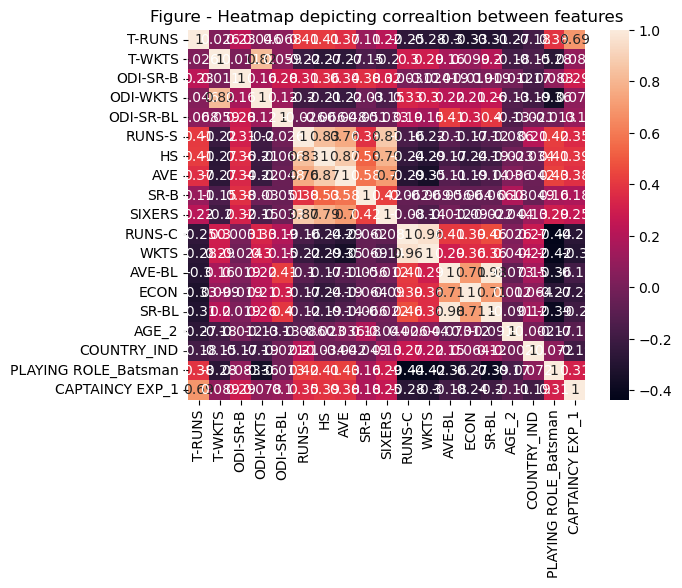

In [354]:
plt.figure( figure = (12,10))
sn.heatmap(X[columns_with_large_vif].corr(), annot = True);
plt.title("Figure - Heatmap depicting correaltion between features");

In [230]:
# From the heatmap, we see the following features are highly correlated and hence removed and retain only one of the features from the correlated pairs. 


In [355]:
columns_to_be_removed = ["T-RUNS", "T-WKTS", "RUNS-S", "HS", "AVE", "RUNS-C", "SR-B", "AVE-BL", "ECON", "ODI-SR-B", "ODI-RUNS-S", "AGE_2", "SR-BL"]

In [356]:
X_new_features =  list(set(X_features) - set(columns_to_be_removed))

In [357]:
X_features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [358]:
columns_to_be_removed

['T-RUNS',
 'T-WKTS',
 'RUNS-S',
 'HS',
 'AVE',
 'RUNS-C',
 'SR-B',
 'AVE-BL',
 'ECON',
 'ODI-SR-B',
 'ODI-RUNS-S',
 'AGE_2',
 'SR-BL']

In [359]:
get_vif_factors(X[X_new_features])

,column,VIF
0,PLAYING ROLE_Batsman,2.680184
1,ODI-WKTS,2.743185
2,CAPTAINCY EXP_1,2.459075
3,COUNTRY_NZ,1.172564
4,COUNTRY_WI,1.192958
5,COUNTRY_SL,1.519839
6,ODI-SR-BL,2.802249
7,COUNTRY_SA,1.415636
8,PLAYING ROLE_Bowler,3.059085
9,WKTS,2.882520


In [360]:
# The VIFs on the final set of variable indicate that there are no multi-collinearity present any more (VIF values are less than 4). We can proceed to build model with these sets of variables.


The **Variance Inflation Factor (VIF)** is a measure used in statistics to detect the presence and severity of multicollinearity in a regression analysis. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, which can distort the results of the regression analysis.

### Definition
The VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. It is calculated for each independent variable in the model. The formula for VIF is:

$$
\text{VIF}_i = \frac{1}{1 - R_i^2}
$$

where \( R_i^2 \) is the coefficient of determination obtained by regressing the \( i \)-th independent variable on all other independent variables.

### Interpretation
- **VIF = 1**: No multicollinearity.
- **1 < VIF < 5**: Moderate multicollinearity, usually acceptable.
- **VIF > 5**: High multicollinearity, which may be problematic and requires further investigation.

### Example
Suppose you have a regression model with three independent variables \( X_1 \), \( X_2 \), and \( X_3 \). To calculate the VIF for \( X_1 \), you would regress \( X_1 \) on \( X_2 \) and \( X_3 \) and obtain the \( R^2 \) value from this regression. Plug this \( R^2 \) value into the VIF formula to get the VIF for \( X_1 \).

### Why It Matters
High VIF values indicate that the independent variables are highly correlated, which can lead to unreliable estimates of the regression coefficients. This makes it difficult to determine the individual effect of each independent variable on the dependent variable.

### Addressing High VIF
If you encounter high VIF values, you can:
- **Remove highly correlated predictors**: Simplify the model by removing one of the correlated variables.
- **Combine variables**: Create a new variable that combines the correlated variables.
- **Principal Component Analysis (PCA)**: Use PCA to transform the correlated variables into a set of uncorrelated components.

Understanding and addressing multicollinearity is crucial for building reliable and interpretable regression models¹²³.

If you have any more questions or need further clarification, feel free to ask!

Source: Conversation with Copilot, 4/11/2024
(1) Variance inflation factor - Wikipedia. https://en.wikipedia.org/wiki/Variance_inflation_factor.
(2) Variance Inflation Factors (VIFs) - Statistics By Jim. https://statisticsbyjim.com/regression/variance-inflation-factors/.
(3) Variance Inflation Factor (VIF) - Investopedia. https://www.investopedia.com/terms/v/variance-inflation-factor.asp.
(4) Variance Inflation Factor (VIF) - Overview, Formula, Uses. https://corporatefinanceinstitute.com/resources/data-science/variance-inflation-factor-vif/.

In [361]:
# Building A New Model with after removing all the Multi-collienearity
train_X = train_X[X_new_features]
ipl_model_2 = sm.OLS(train_Y, train_X). fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.0952 
Date:                       2024-11-04 13:51   BIC:                           3012.6942 
No. Observations:           104                Log-Likelihood:                -1464.5   
Df Model:                   18                 F-statistic:                   16.50     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2070e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
PLAYING ROLE_Batsman    121435.5192 106677.8020  1.1383 0.2581  -90632.9324  333503.9708
ODI-WKTS                   773.3722    470.6750  1.6431 0.1040    -162.2987    1709.0431
CAPTAINCY EXP_1         208140.5510  98145.7199  2.1207 0.0368   13033.3172  403247.7848
COUNTRY_NZ              143103.1354 151783.0999  0.9428 0.3484 -158631.6808  444837.9516
COUNTRY_WI              -22179.7156 212927.6516 -0.1042 0.9173 -445465.8777  401106.4465
COUNTRY_SL               55647.9077 142271.1093  0.3911 0.6967 -227177.6970  338473.5124
ODI-SR-BL                  919.2605   1268.7453  0.7245 0.4707   -1602.9217    3441.4426
COUNTRY_SA              108720.1787 115054.1166  0.9449 0.3473 -119999.8352  337440.1926
PLAYING ROLE_Bowler     -18288.4846 106009.3141 -0.1725 0.8634 -229028.0264  192451.0571
WKTS                      2431.7954   2104.9101  1.1553 0.2512   -1752.6274    6616.2182
COUNTRY_BAN            -108798.0165 369212.4069 -0.2947 0.7690 -842767.9895  625171.9565
COUNTRY_ZIM             -68453.1947 390791.5483 -0.1752 0.8614 -845321.0811  708414.6916
PLAYING ROLE_W. Keeper  -54843.0414 169863.8547 -0.3229 0.7476 -392521.2086  282835.1257
COUNTRY_ENG             682645.6706 216117.2341  3.1587 0.0022  253018.8285 1112272.5128
AGE_3                    -9122.5269  98049.2302 -0.0930 0.9261 -204037.9455  185792.8917
COUNTRY_IND             282632.3214  96182.3486  2.9385 0.0042   91428.1405  473836.5023
COUNTRY_PAK             122776.9907 159563.0798  0.7695 0.4437 -194423.9137  439977.8952
SIXERS                    7861.8754   2085.7886  3.7693 0.0003    3715.4649   12008.2860
----------------------------------------------------------------------------------------
Omnibus:                       8.641               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.351
Skew:                          0.624               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1491 
========================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the                 model does
not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[3] The condition number is large, 1.49e+03. This might indicate                that
there are strong multicollinearity or other numerical                problems.
"""

# The P-values of the coffecient estimated show wheather the vairable area statistically significant in influencing response variable or not. If the P-value is less than the significance value then the feature is statistically significant , other wise it is not. The value of Alpha is usaually selected as 0.05; however it may be chosen based on the context of the problem.
Based on the p-values, only the variables COUNTRY_IND, COUNTRY_ENG, SIXERS, CAPTAINCY_EXP_1 have come out statistically significant. So, the features decide the SOLD PRICE are
1. Whether the player belong to India or England
2 How many sixes has the player hit in privious version of the IPL? How many wickets have been taken by the player in ODIs?
3. Whether the play er has nay prvsious captaincy experience or not.


# Lets creat a new list called significant_vars to store the column names of significaant variabls and build a new model

In [362]:
significant_vars = ["COUNTRY_IND", "COUNTRY_ENG", "SIXERS", "CAPTAINCY EXP_1"]

In [364]:
train_X = train_X[significant_vars]

In [365]:
train_X

,COUNTRY_IND,COUNTRY_ENG,SIXERS,CAPTAINCY EXP_1
70,0,0,0,0
78,1,0,0,0
47,1,0,28,0
0,0,0,0,0
12,1,0,9,0
...,...,...,...,...
71,1,0,19,0
106,0,0,1,0
14,1,0,36,0
92,0,0,1,0


In [366]:
ipl_model_3 = sm.OLS(train_Y, train_X).fit()

In [367]:
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2024-11-04 13:53 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

# The following inference can be derived from the latest model ipl_model_3
1. All the variables are statistically significant, as p-value is less than 0.05%.
2. The overall model is signifcant as the p-value for the F-statistics is also less than 0.05%
3. The model can explain 71.5% of the variance in SOLD PRICE as the R-squared values is 0.715 and the adjusted R-squared value is 0.704%. Adjusted R-squareed is a measure that is calculated after normalizing SSE and SST with the corresponding degrees of freedom.


In [266]:
# Residual Analysis in Multiple Linear Regression
## Test for Normality of Residuals (P-P Plot)

In [368]:
def draw_pp_plot(model, title):
    probplot = sm.ProbPlot(model.resid);
    plt.figure(figsize = (8,6));
    probplot.ppplot(line = '45');
    plt.title(title);
    plt.show();

<Figure size 800x600 with 0 Axes>

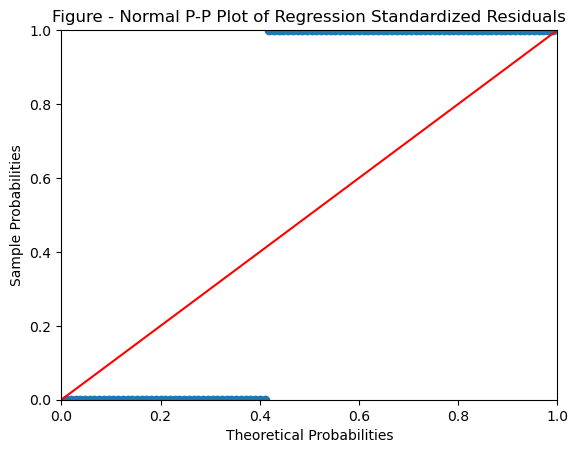

In [369]:
draw_pp_plot(ipl_model_3, "Figure - Normal P-P Plot of Regression Standardized Residuals")

# Explaination on how to calculate Variance Inflation Factor using a simple example
Sure! Let's go through a simple example to calculate the Variance Inflation Factor (VIF) step-by-step using a small dataset.

### Example Dataset
Consider a dataset with three independent variables \( X_1 \), \( X_2 \), and \( X_3 \):

| Observation | \( X_1 \) | \( X_2 \) | \( X_3 \) |
|-------------|-----------|-----------|-----------|
| 1           | 1         | 2         | 3         |
| 2           | 2         | 3         | 4         |
| 3           | 3         | 4         | 5         |
| 4           | 4         | 5         | 6         |
| 5           | 5         | 6         | 7         |

### Step-by-Step Calculation

1. **Calculate \( R^2 \) for Each Variable**:
   - **Regress \( X_1 \) on \( X_2 \) and \( X_3 \)**:
     - Perform a linear regression of \( X_1 \) on \( X_2 \) and \( X_3 \).
     - Let's assume the \( R^2 \) value obtained is \( R_1^2 = 0.98 \).

   - **Regress \( X_2 \) on \( X_1 \) and \( X_3 \)**:
     - Perform a linear regression of \( X_2 \) on \( X_1 \) and \( X_3 \).
     - Let's assume the \( R^2 \) value obtained is \( R_2^2 = 0.99 \).

   - **Regress \( X_3 \) on \( X_1 \) and \( X_2 \)**:
     - Perform a linear regression of \( X_3 \) on \( X_1 \) and \( X_2 \).
     - Let's assume the \( R^2 \) value obtained is \( R_3^2 = 0.99 \).

2. **Use the VIF Formula**:
   - The formula for VIF is:
     \[
     \text{VIF}_i = \frac{1}{1 - R_i^2}
     \]

3. **Calculate VIF for Each Variable**:
   - **For \( X_1 \)**:
     \[
     \text{VIF}_1 = \frac{1}{1 - 0.98} = \frac{1}{0.02} = 50
     \]

   - **For \( X_2 \)**:
     \[
     \text{VIF}_2 = \frac{1}{1 - 0.99} = \frac{1}{0.01} = 100
     \]

   - **For \( X_3 \)**:
     \[
     \text{VIF}_3 = \frac{1}{1 - 0.99} = \frac{1}{0.01} = 100
     \]

### Interpretation
- **VIF for \( X_1 \) is 50**: This indicates very high multicollinearity.
- **VIF for \( X_2 \) is 100**: This indicates extremely high multicollinearity.
- **VIF for \( X_3 \) is 100**: This also indicates extremely high multicollinearity.

### Conclusion
In this example, all VIF values are very high, suggesting severe multicollinearity among the variables. This means that the independent variables \( X_1 \), \( X_2 \), and \( X_3 \) are highly correlated with each other, which can distort the results of a regression analysis.

### Addressing High VIF
To address high VIF values, you can:
- **Remove one or more of the highly correlated variables**.
- **Combine correlated variables into a single predictor**.
- **Use techniques like Principal Component Analysis (PCA)** to reduce dimensionality.

I hope this example helps clarify how to calculate and interpret VIF! If you have any more questions or need further assistance, feel free to ask.

Source: Conversation with Copilot, 4/11/2024
(1) Variance inflation factor - Wikipedia. https://en.wikipedia.org/wiki/Variance_inflation_factor.
(2) Variance Inflation Factors (VIFs) - Statistics By Jim. https://statisticsbyjim.com/regression/variance-inflation-factors/.
(3) Variance Inflation Factor (VIF) - Investopedia. https://www.investopedia.com/terms/v/variance-inflation-factor.asp.
(4) Variance Inflation Factor (VIF) - Overview, Formula, Uses. https://corporatefinanceinstitute.com/resources/data-science/variance-inflation-factor-vif/.
(5) 10.7 - Detecting Multicollinearity Using Variance Inflation Factors. https://online.stat.psu.edu/stat462/node/180/.
(6) 12.4 - Detecting Multicollinearity Using Variance Inflation Factors. https://online.stat.psu.edu/stat501/lesson/12/12.4.

Let's go through a simple example to calculate the Variance Inflation Factor (VIF) step-by-step using a small dataset.

### Example Dataset
Consider a dataset with three independent variables \( X_1 \), \( X_2 \), and \( X_3 \):

| Observation | \( X_1 \) | \( X_2 \) | \( X_3 \) |
|-------------|-----------|-----------|-----------|
| 1           | 1         | 2         | 3         |
| 2           | 2         | 3         | 4         |
| 3           | 3         | 4         | 5         |
| 4           | 4         | 5         | 6         |
| 5           | 5         | 6         | 7         |

### Step-by-Step Calculation

1. **Calculate \( R^2 \) for Each Variable**:
   - **Regress \( X_1 \) on \( X_2 \) and \( X_3 \)**:
     - Perform a linear regression of \( X_1 \) on \( X_2 \) and \( X_3 \).
     - Let's assume the \( R^2 \) value obtained is \( R_1^2 = 0.98 \).

   - **Regress \( X_2 \) on \( X_1 \) and \( X_3 \)**:
     - Perform a linear regression of \( X_2 \) on \( X_1 \) and \( X_3 \).
     - Let's assume the \( R^2 \) value obtained is \( R_2^2 = 0.99 \).

   - **Regress \( X_3 \) on \( X_1 \) and \( X_2 \)**:
     - Perform a linear regression of \( X_3 \) on \( X_1 \) and \( X_2 \).
     - Let's assume the \( R^2 \) value obtained is \( R_3^2 = 0.99 \).

2. **Use the VIF Formula**:
   - The formula for VIF is:
     \[
     \text{VIF}_i = \frac{1}{1 - R_i^2}
     \]

3. **Calculate VIF for Each Variable**:
   - **For \( X_1 \)**:
     \[
     \text{VIF}_1 = \frac{1}{1 - 0.98} = \frac{1}{0.02} = 50
     \]

   - **For \( X_2 \)**:
     \[
     \text{VIF}_2 = \frac{1}{1 - 0.99} = \frac{1}{0.01} = 100
     \]

   - **For \( X_3 \)**:
     \[
     \text{VIF}_3 = \frac{1}{1 - 0.99} = \frac{1}{0.01} = 100
     \]

### Interpretation
- **VIF for \( X_1 \) is 50**: This indicates very high multicollinearity.
- **VIF for \( X_2 \) is 100**: This indicates extremely high multicollinearity.
- **VIF for \( X_3 \) is 100**: This also indicates extremely high multicollinearity.

### Conclusion
In this example, all VIF values are very high, suggesting severe multicollinearity among the variables. This means that the independent variables \( X_1 \), \( X_2 \), and \( X_3 \) are highly correlated with each other, which can distort the results of a regression analysis.

### Addressing High VIF
To address high VIF values, you can:
- **Remove one or more of the highly correlated variables**.
- **Combine correlated variables into a single predictor**.
- **Use techniques like Principal Component Analysis (PCA)** to reduce dimensionality.

I hope this example helps clarify how to calculate and interpret VIF! If you have any more questions or need further assistance, feel free to ask.

Source: Conversation with Copilot, 4/11/2024
(1) Variance inflation factor - Wikipedia. https://en.wikipedia.org/wiki/Variance_inflation_factor.
(2) Variance Inflation Factors (VIFs) - Statistics By Jim. https://statisticsbyjim.com/regression/variance-inflation-factors/.
(3) Variance Inflation Factor (VIF) - Investopedia. https://www.investopedia.com/terms/v/variance-inflation-factor.asp.
(4) Variance Inflation Factor (VIF) - Overview, Formula, Uses. https://corporatefinanceinstitute.com/resources/data-science/variance-inflation-factor-vif/.
(5) 10.7 - Detecting Multicollinearity Using Variance Inflation Factors. https://online.stat.psu.edu/stat462/node/180/.
(6) 12.4 - Detecting Multicollinearity Using Variance Inflation Factors. https://online.stat.psu.edu/stat501/lesson/12/12.4.

# Let's go through the process of testing for normality of residuals using a P-P (Probability-Probability) plot with a simple example.

### What is a P-P Plot?
A P-P plot is a graphical technique for assessing whether a data set follows a specified distribution. In the context of regression analysis, we use it to check if the residuals (errors) of the model are normally distributed. If the residuals are normally distributed, the points in the P-P plot will lie approximately along a straight line.

### Example Scenario
Let's consider a simple linear regression model where we predict `Y` based on `X`:

| Observation | \( X \) | \( Y \) |
|-------------|---------|---------|
| 1           | 1       | 2       |
| 2           | 2       | 3       |
| 3           | 3       | 5       |
| 4           | 4       | 4       |
| 5           | 5       | 6       |

### Step-by-Step Process

1. **Fit the Linear Regression Model**:
   - We fit a linear regression model to predict `Y` from `X`.
   - The fitted model might look like: \( \hat{Y} = 1.2X + 0.8 \).

2. **Calculate Residuals**:
   - Residuals are the differences between the observed values and the predicted values.
   - For each observation, calculate the residual: \( \text{Residual} = Y - \hat{Y} \).

3. **Standardize the Residuals**:
   - Standardize the residuals to have a mean of 0 and a standard deviation of 1.

4. **Create the P-P Plot**:
   - **Theoretical Quantiles**: These are the expected quantiles if the residuals were normally distributed.
   - **Sample Quantiles**: These are the actual quantiles of the standardized residuals.
   - Plot the theoretical quantiles on the x-axis and the sample quantiles on the y-axis.

### Example Calculation
Let's assume the residuals from our model are:

| Observation | Residual |
|-------------|----------|
| 1           | -0.6     |
| 2           | -0.4     |
| 3           | 0.2      |
| 4           | -0.8     |
| 5           | 1.6      |

1. **Standardize the Residuals**:
   - Mean of residuals = 0
   - Standard deviation of residuals = 1 (for simplicity)

2. **Theoretical Quantiles**:
   - For a normal distribution, the theoretical quantiles can be obtained from a standard normal distribution table.

3. **Sample Quantiles**:
   - Sort the residuals and calculate their percentiles.

4. **Plot the P-P Plot**:
   - If the residuals are normally distributed, the points should lie along a straight line.

### Interpretation
- **Straight Line**: If the points in the P-P plot lie approximately along a straight line, it suggests that the residuals are normally distributed.
- **Deviations from Line**: Significant deviations from the line indicate that the residuals are not normally distributed.

### Visual Example
Here's a simple code snippet to create a P-P plot in Python using `matplotlib` and `scipy`:

```python
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Example residuals
residuals = np.array([-0.6, -0.4, 0.2, -0.8, 1.6])

# Standardize residuals
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

# Create P-P plot
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('P-P Plot of Residuals')
plt.show()
```

This code will generate a P-P plot, and you can visually inspect if the points lie along a straight line.

I hope this helps! If you have any more questions or need further clarification, feel free to ask.

Source: Conversation with Copilot, 4/11/2024
(1) 4.6 - Normal Probability Plot of Residuals | STAT 501 - Statistics Online. https://online.stat.psu.edu/stat501/lesson/4/4.6.
(2) 4.6 - Normal Probability Plot of Residuals | STAT 462 - Statistics Online. https://online.stat.psu.edu/stat462/node/122/.
(3) The Assumptions of Simple Linear Regression: Normal Probability Plot of .... https://learn.saylor.org/mod/book/view.php?id=55338&chapterid=40942.
(4) 4.6 - Normal Probability Plot of Residuals - Statistics Online. https://online.stat.psu.edu/stat501/book/export/html/916.